In [1]:
import os

In [2]:
files=os.listdir('train/')

In [3]:
len(files)

25000

In [4]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,Flatten,Dropout,BatchNormalization
from PIL import Image , ImageFilter
import matplotlib.pyplot as plt


In [20]:
x = []
y = []



Original image


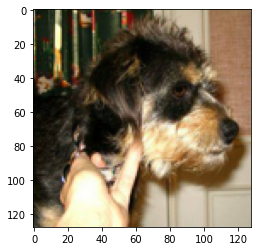

rotated 90 image 


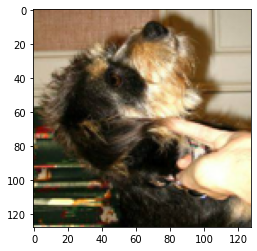

noise image 


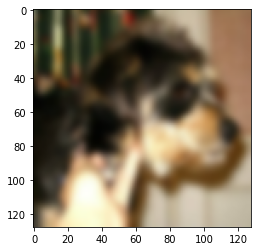

In [21]:
#image augmentation
image = Image.open('train/'+files[0])
image=image.resize((128,128))
print("Original image")
plt.imshow(image)
plt.show()

rot =image.transpose(Image.ROTATE_90)
print("rotated 90 image ")
plt.imshow(rot)
plt.show()

noised = image.filter(ImageFilter.GaussianBlur(2))
print("noise image ")
plt.imshow(noised)
plt.show()

In [22]:
for i in range(5000):
    #image augmentation
    image = Image.open('train/'+files[i])
    image=image.resize((128,128))
    
    rot90 =image.transpose(Image.ROTATE_90)
    rot180 =rot90.transpose(Image.ROTATE_90)
    rot270 =rot180.transpose(Image.ROTATE_90)
    
    noised = image.filter(ImageFilter.GaussianBlur(2))
    
    x.append(np.asarray(image))
    x.append(np.asarray(rot90))
    x.append(np.asarray(rot180))
    x.append(np.asarray(rot270))
    x.append(np.asarray(noised))
    
    z=files[i].split('.')
    v=0
    if(z[0]=='cat'):
        v=0    
    else:
        v=1
    #appending expected output    
    for i in range(5):    
        y.append(v)
    

In [23]:
x=np.array(x)
y = np.array(y)

In [24]:
print(x.shape)
print(y.shape)

(25000, 128, 128, 3)
(25000,)


In [25]:
from sklearn.model_selection import train_test_split


In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,
train_size=0.75,
test_size=0.25,
random_state=42)

In [27]:
def catdogmod():
    mode = Sequential()
    mode.add(Conv2D(64,(3,3),activation ='relu',input_shape=(128,128,3)))
    mode.add(Conv2D(64,(3,3),activation='relu'))
    mode.add(BatchNormalization())
    mode.add(MaxPooling2D(2,2))

    mode.add(Conv2D(64,(3,3),activation='relu'))
    mode.add(Conv2D(64,(3,3),activation='relu'))
    mode.add(BatchNormalization())
    mode.add(MaxPooling2D(2,2))
    mode.add(Dropout(0.25))

    mode.add(Conv2D(64,(3,3),activation='relu'))
    mode.add(Conv2D(64,(3,3),activation='relu'))
    mode.add(BatchNormalization())
    mode.add(MaxPooling2D(2,2))
    mode.add(Dropout(0.25))

    mode.add(Conv2D(64,(3,3),activation='relu'))
    mode.add(Conv2D(64,(3,3),activation='relu'))
    mode.add(BatchNormalization())
    mode.add(MaxPooling2D(2,2))


    mode.add(Flatten())
    mode.add(Dense(32,activation='relu'))
    mode.add(Dense(1,activation='sigmoid'))
    return mode

In [28]:
model = catdogmod()

In [29]:
import tensorflow as tf
checkpoint_path = "cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [30]:
model.compile(loss="binary_crossentropy", 
             optimizer='adam',
             metrics=["accuracy"])

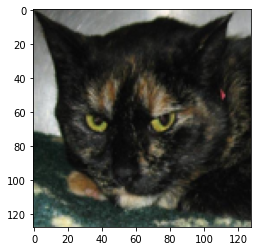

0


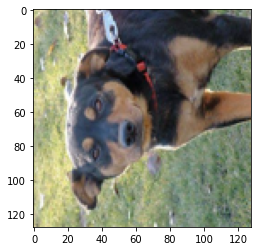

1


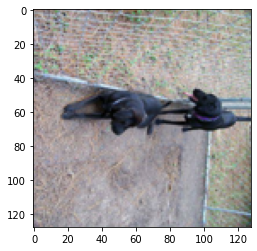

1


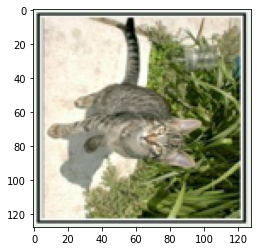

0


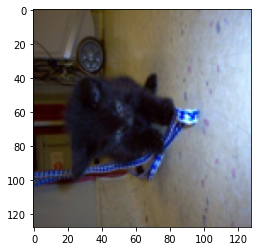

0


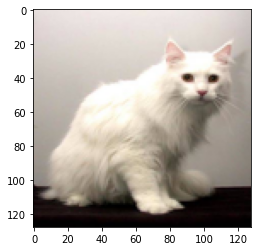

0


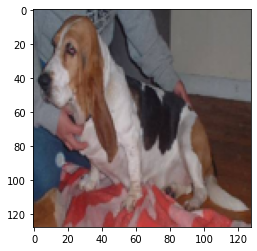

1


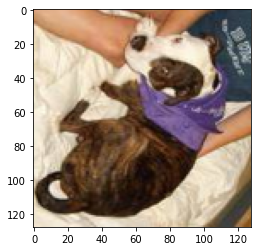

1


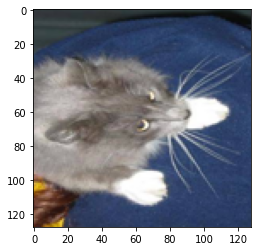

0


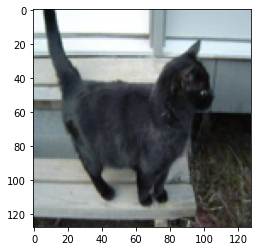

0


In [31]:
for i in range(10):
    plt.imshow(x_train[i])
    plt.show()
    print(y_train[i])

In [32]:
model.fit(x_train,y_train,epochs=12,batch_size=64,callbacks = [cp_callback])

Epoch 1/12
293/293 [==============================] - ETA: 0s - loss: 0.6650 - accuracy: 0.6039
Epoch 00001: saving model to cp.ckpt
293/293 [==============================] - 590s 2s/step - loss: 0.6650 - accuracy: 0.6039
Epoch 2/12
293/293 [==============================] - ETA: 0s - loss: 0.6021 - accuracy: 0.6771
Epoch 00002: saving model to cp.ckpt
293/293 [==============================] - 592s 2s/step - loss: 0.6021 - accuracy: 0.6771
Epoch 3/12
293/293 [==============================] - ETA: 0s - loss: 0.5626 - accuracy: 0.7092
Epoch 00003: saving model to cp.ckpt
293/293 [==============================] - 591s 2s/step - loss: 0.5626 - accuracy: 0.7092
Epoch 4/12
293/293 [==============================] - ETA: 0s - loss: 0.5283 - accuracy: 0.7359
Epoch 00004: saving model to cp.ckpt
293/293 [==============================] - 590s 2s/step - loss: 0.5283 - accuracy: 0.7359
Epoch 5/12
293/293 [==============================] - ETA: 0s - loss: 0.5072 - accuracy: 0.7496
Epoch 00005:

In [35]:
y_pred=model.predict(x_test)

In [36]:
y_pred

array([[0.18064854],
       [0.9752914 ],
       [0.02890548],
       ...,
       [0.2748256 ],
       [0.9994423 ],
       [0.56899   ]], dtype=float32)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
sub=[]
for y1 in y_pred:
    if y1>0.5:
        sub.append(1)
    else:
        sub.append(0)
subm = np.array(sub)    

In [39]:
subm

array([0, 1, 0, ..., 0, 1, 1])

In [40]:
accuracy_score(y_test,subm)

0.80192